In [1]:
import numpy as np
import pandas as pd
# from plotnine import *
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


# Exploratory Data Analysis
Session Data (Non-Fleet)
## 3 Driver and Vehicle


In [2]:
# do verbose sanity checks, and do not save in the end
test = False
# working on EC2 instance
cloud = True

In [3]:
if cloud:
    path = "../../data/"
    file = "sessions_clean.csv"
else:
    path = "/home/ourownstory/github/data/SLAC"
    file = "Charging_Session_SLAC.csv"
    
if test:
    nrows = 1e6
else:
    nrows = None
    
def get_csv():
    print("Reading {} rows of dataframe".format(nrows if nrows is not None else "ALL"))
    return pd.read_csv(path + file, index_col=False, nrows=nrows)#, low_memory=False)

In [6]:
df_raw = get_csv()
sessions = df_raw.copy(deep=True)

In [7]:
print(list(sessions))
# print(sessions.head(5))

['Session ID', 'Station ID', 'Port ID', 'Connector Type', 'POI Category', 'POI Subcategory', 'Session Time Zone', 'Session Time (secs)', 'Charging Time (secs)', 'Start SoC', 'End SoC', 'Full Charge', 'Energy (kWh)', 'Driver ID', 'Driver Zip', 'Vehicle Make', 'Vehicle Model', 'Battery Capacity', 'EV Type', '$ Fee', 'Fee Currency', 'Zip Code', 'City', 'County', 'State', 'Country', 'Driver City', 'Driver State', 'Driver Country', 'Max Power', 'Session Type', 'Vehicle Model Year', 'start_datetime', 'start_seconds', 'start_year', 'start_month', 'start_day', 'start_weekday']


# Driver
* Driver ID 46568
* Driver Zip 1533
* Driver City 1038
* Driver State 48
* Driver Country 5
['United States' nan 'Canada' 'Germany' 'Mexico']


644141.0    90318
775523.0    56904
368173.0    27830
652339.0    22904
749513.0    16905
187331.0    16135
162929.0    11059
652327.0     9335
151789.0     8723
5032.0       7856
Name: Driver ID, dtype: int64


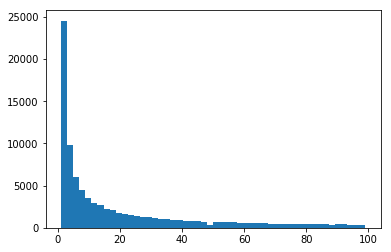

In [8]:
col = "Driver ID"
df = sessions[col].value_counts()
print(df.head(10))
plot = plt.hist(df[df<100], bins=50)
# plot = plt.hist(np.log(df), bins=50)

95014    368706
94539    366092
95120    270370
94043    255569
94070    255069
95035    247738
95124    237042
94087    222621
94536    219054
94555    205295
Name: Driver Zip, dtype: int64


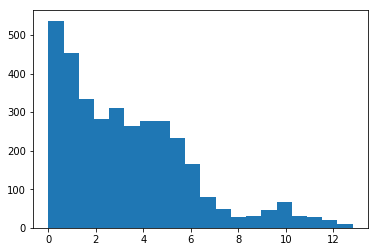

In [9]:
col = "Driver Zip"
df = sessions[col].value_counts()
print(df.head(10))
# plot = plt.hist(df[df<1e4], bins=10)
plot = plt.hist(np.log(df), bins=20)

In [10]:
col = "Driver City"
df = sessions[col].value_counts()
print(df.head(10))

San Jose         2487555
Fremont           924769
Sunnyvale         501595
Mountain View     427522
San Francisco     412969
Cupertino         362215
Santa Clara       341776
Palo Alto         268067
San Carlos        252667
Los Gatos         241685
Name: Driver City, dtype: int64


In [11]:
col = "Driver State"
df = sessions[col].value_counts()
print(df.head(10))

California       11320660
Washington          10222
Texas                9028
Alabama              8016
Oregon               4583
Colorado             4088
Nevada               3242
Arizona              2655
Virginia             2644
Massachusetts        2506
Name: Driver State, dtype: int64


In [12]:
col = "Driver Country"
df = sessions[col].value_counts()
print(df)

United States    11638076
Name: Driver Country, dtype: int64


# Vehicle

* Vehicle Make 29
* Vehicle Model 74
* Battery Capacity 65
* EV Type 3
* Vehicle Model Year 11
[2015. 2017. 2013. 2016.   nan 2014. 2012. 2011. 2018. 2010. 2008.]


In [13]:
col = "Vehicle Make"
df = sessions[col].value_counts()
print(df)
# print(df.head(10))

Nissan              2779979
Chevrolet           2546124
Tesla               1491407
Ford                 832840
Volkswagen           792056
BMW                  710798
Toyota               655853
Fiat                 490103
Mercedes-Benz        158014
Honda                123835
Kia                  101511
Audi                  80083
Smart                 44634
Hyundai               39945
Chrysler              34751
Volvo                 32039
Mitsubishi            25069
Porsche               16685
Cadillac               9081
Zero                   3361
Mini                   2656
Fisker                 2451
CODA                   1589
Think                  1452
Brammo                  915
Karma Automative        317
Workhorse                89
BYD                      73
Daimler                  60
Jaguar                   23
Holden                    5
Name: Vehicle Make, dtype: int64


In [14]:
col = "Vehicle Model"
df = sessions[col].value_counts()
# print(df)
print(df.head(20))
top_20_models = df.head(20).index

Leaf                      2779408
Volt                      1712063
Model S                    908617
e-Golf                     792055
i3                         599899
Bolt EV                    542008
500e                       490103
Model 3                    393213
Fusion Energi              390336
Prius Plug-in Hybrid       361517
Spark EV                   292058
C-Max Energi               230002
Prius Prime                212676
Focus Electric             209953
Model X                    179869
B-Class                    138756
Soul EV                     83300
A3 e-Tron                   80083
RAV4 EV                     79588
Clarity Plug-in Hybrid      54059
Name: Vehicle Model, dtype: int64


/home/ec2-user/anaconda3/envs/eda/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/eda/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


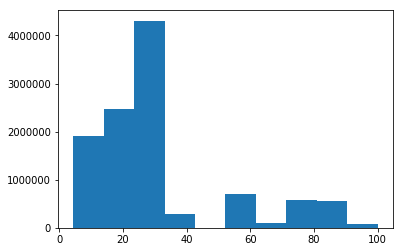

In [15]:
col = "Battery Capacity"
# df = sessions[col].value_counts()
# print(df)
df = sessions[col]
plot = plt.hist(df, bins=10)

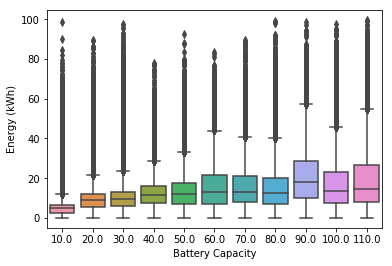

In [16]:
col1 = "Battery Capacity"
col2 = "Energy (kWh)"

df = sessions.copy(deep=True)

x = df[col1] //10 *10 +10
y = df[col2] 
sns.boxplot(x,y)

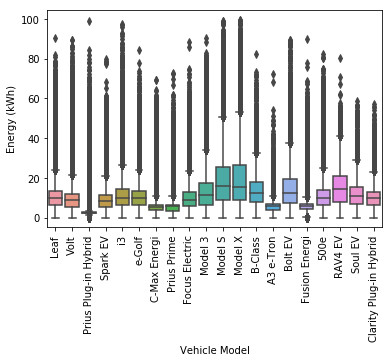

In [17]:
col1 = "Vehicle Model"
col2 = "Energy (kWh)"

df = sessions.copy(deep=True)
df = df[df[col1].apply(lambda x: x in top_20_models)]

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)


PLUGIN    7003000
HYBRID    1923893
Name: EV Type, dtype: int64


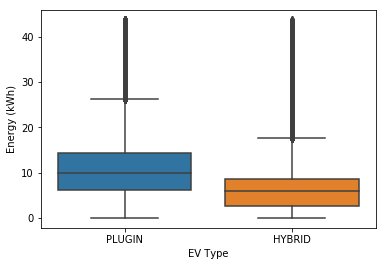

In [18]:
col = "EV Type"
df = sessions[col].value_counts()
print(df)

col1 = col
col2 = "Energy (kWh)"

df = sessions.copy(deep=True)
p = np.percentile(df[col2], 99)
df = df[df[col2] < p]

x = df[col1] 
y = df[col2] 
sns.boxplot(x,y)

In [19]:
col = "Vehicle Model Year"
for y in [2015, 2016, 2017, 2018]:
    print(y)
    df = sessions[sessions["start_datetime"].apply(lambda x : int(x[:4])) == y][col].value_counts()
    print(df)


2015
2015.0    518998
2014.0    219596
2013.0    116298
2012.0     44684
2011.0     12090
2016.0     11296
2010.0       668
2017.0       171
2008.0        95
Name: Vehicle Model Year, dtype: int64
2016
2015.0    1067261
2016.0     398585
2014.0     376973
2013.0     239731
2012.0      84614
2017.0      28148
2011.0      23853
2010.0       1023
2008.0        251
Name: Vehicle Model Year, dtype: int64
2017
2015.0    951056
2016.0    813323
2017.0    590378
2014.0    394990
2013.0    276075
2012.0     92522
2011.0     30264
2018.0      2464
2010.0      1203
2008.0       480
Name: Vehicle Model Year, dtype: int64
2018
2017.0    1044298
2016.0     700730
2015.0     656240
2018.0     424271
2014.0     335033
2013.0     224903
2012.0      80011
2011.0      29685
2010.0        780
2008.0        570
2019.0        565
2009.0         17
Name: Vehicle Model Year, dtype: int64


## Session behavior by driver ID
* Session Time
* Session Energy
* Start Time
* End Time

In [23]:
col = "Driver ID"
top50_drivers = sessions[col].value_counts().head(50).tail(20).index
top50_drivers = [int(x) for x in top50_drivers]
# print(top50_drivers)

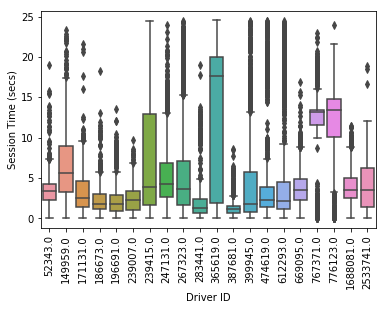

In [24]:
col1 = "Driver ID"
col2 = "Session Time (secs)"
df = sessions.copy(deep=True)

df = df[df[col1].apply(lambda x: x in top50_drivers)]

df = df[df[col2] < np.percentile(df[col2], 95)]
df[col2] = df[col2] /3600

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)

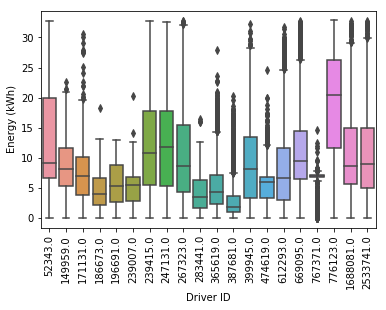

In [27]:
col1 = "Driver ID"
col2 = "Energy (kWh)"
df = sessions.copy(deep=True)

df = df[df[col1].apply(lambda x: x in top50_drivers)]

df = df[df[col2] < np.percentile(df[col2], 95)]

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)
# ax.set(xlabel='Session Duration', ylabel='Charging Flexibility')
plt.savefig("plots/Driver_Top20_Energy.png")

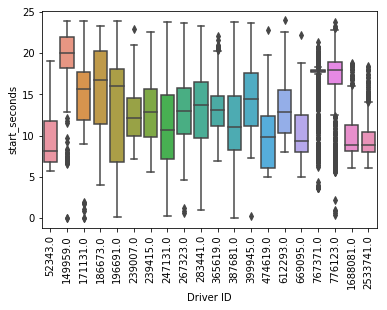

In [26]:
col1 = "Driver ID"
col2 = "start_seconds"
df = sessions.copy(deep=True)

df = df[df[col1].apply(lambda x: x in top50_drivers)]

# df = df[df[col2] < np.percentile(df[col2], 95)]
df[col2] = df[col2] /3600

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)

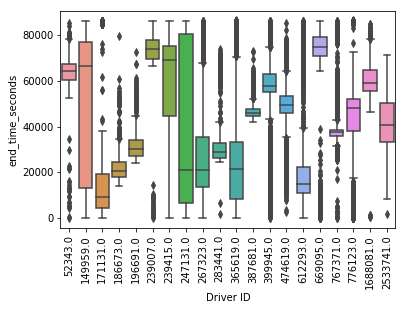

In [28]:
col1 = "Driver ID"
col2 = "end_time_seconds"
df = sessions.copy(deep=True)

df = df[df[col1].apply(lambda x: x in top50_drivers)]

# df = df[df[col2] < np.percentile(df[col2], 95)]
df[col2] =  (df[col1] + df["Session Time (secs)"]) %(24*3600)

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)

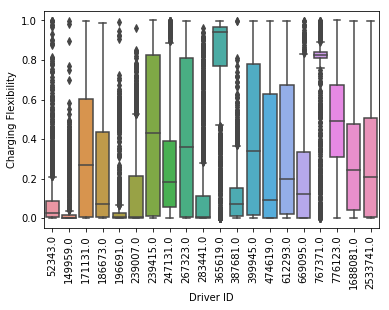

In [30]:
# ratio of charge time vs session time per hour

col1 = "Driver ID"
col2 = "Charging Time (secs)"
col3 = "Session Time (secs)"

df = sessions.copy(deep=True)
df = df[df[col1].apply(lambda x: x in top50_drivers)]
# p_99 = np.nanpercentile(df[col3], 99)
# print(p_99/3600)
# df = df[df[col3] < p_99]

df = df[(df[col3] - df[col2]) >= 0]
# df = df[df[col3] > 3600]

x = df[col1]
y = 1 - df[col2] / df[col3]
ax = sns.boxplot(x,y)
ax.set(xlabel='Driver ID', ylabel='Charging Flexibility')
ax = plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig("plots/Driver_Top20_Flex.png")